In [ ]:
# NOME_PT = {"Accuracy" : "Acurácia", "Precision" : "Precisão", "Recall": "Revocação",}
# PT_LABELS = ['Acurácia', 'Precisão', 'Recall']


# # Import libraries
# import pandas as pd
# import matplotlib.pyplot as plt
# import numpy as np


# # Define metrics and models
# metrics = ["Accuracy", "Precision", "Recall"]
# model = "dqn"
# colors = [('red', 'blue'), ('red', 'blue'), ('red', 'blue'), ('red', 'blue')]
# labels = ['Accuracy', 'Precision', 'Recall']

# # Load central results
# central_results = pd.read_csv("central_res.csv")

# # Set width of bar
# barWidth = 0.3

# # Increase the space between model groups
# space_between_groups = 1.0


# # Setting the positions of the bars on x-axis
# r1 = np.arange(len(metrics))
# r2 = [x + 2*barWidth for x in r1]

# # Adjust positions to add space between model groups
# r1 = [x + space_between_groups*i for i, x in enumerate(r1)]
# r2 = [x + space_between_groups*i for i, x in enumerate(r2)]

# added_legend = (False, False)

# #figure size
# plt.figure(figsize=(3, 3))

# for i, (metric, (color1, color2), label) in enumerate(zip(metrics, colors, labels)):
#     # Load the per-round data for the model
#     data = pd.read_csv(f"{model}_plot.csv")

#     # Get the final value for the metric
#     final_value = data[metric].iloc[-1]

#     # Get the central value for the metric from central_res.csv
#     central_value = central_results.loc[central_results["Model Name"] == model, metric].values[0]

#     # Plot bars
#     plt.bar(r1[i], central_value, color=color1, label="Centralizado" if not added_legend[0] else "")
#     plt.bar(r2[i], final_value, color=color2, label=f"Federado" if not added_legend[1] else "")
#     added_legend = (True, True)

#     # Customize the plot
#     plt.xlabel('')
#     plt.ylabel("Valores")
#     plt.title(f"Centralizado vs Federado")
#     plt.xticks([(x + barWidth/2) for x in r1], PT_LABELS)

#     # Set y-axis limits
#     plt.ylim(0.5, 1.0)  # Set y-axis limits

#     # Adjust the legend position
#     plt.legend(loc='upper center', bbox_to_anchor=(0.5, -0.2), ncol=2, frameon=False)
#     plt.tight_layout()


    
#     # Save the figure
#     plt.savefig(f"bar_dqn.png")
# plt.clf()  # Clear the figure for the next plot

<Figure size 300x300 with 0 Axes>

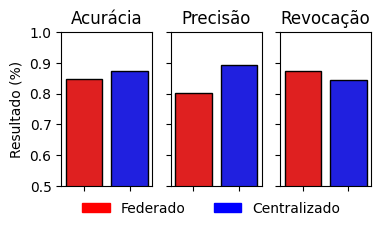

In [1]:
NOME_PT = {"Accuracy" : "Acurácia", "Precision" : "Precisão", "Recall": "Revocação",}
PT_LABELS = ['Acurácia', 'Precisão', 'Recall']


# Import libraries
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import matplotlib.patches as mpatches

# Define metrics and models
metrics = ["Accuracy", "Precision", "Recall"]
model = "dqn"
colors = ['red', 'blue']
labels = ['Accuracy', 'Precision', 'Recall']

# Load central results
results = pd.read_csv("dqn_bars.csv")

fig, ax = plt.subplots(figsize=(4, 2), nrows=1, ncols=3, sharey=True)
for idx_plot, metric in enumerate(metrics):
    sns.barplot(x='Model Name', y=metric, data=results, palette=colors, 
                hue='Model Name', ec='k', ax=ax[idx_plot])
    ax[idx_plot].set_title(NOME_PT[metric])
    ax[idx_plot].set_xlabel('')
    ax[idx_plot].set_ylim(0.5, 1)
    ax[idx_plot].set_ylabel('Resultado (%)')
    ax[idx_plot].set_xticks([0, 1], (' ', ' '))

#criar objetos para cada modelo
dqn_cent = mpatches.Patch(color='red', label='Federado')
dqn_fed = mpatches.Patch(color='blue', label='Centralizado')

fig.legend(handles=[dqn_cent, dqn_fed], loc='lower center', bbox_to_anchor=(0.5, -0.1), ncol=4, frameon=False)

plt.savefig("dqn_bars.png", bbox_inches='tight', dpi=500)